# Interpolating 

In [59]:
#Libraries
import arcpy
from arcpy import env
import pandas as pd
import os 
from arcpy.ia import *
env.overwriteOutput = True

In [60]:
#Workspace Directory
workspace = r"C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica"

In [61]:
#data analysis
df = pd.read_excel(r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\estacoes.xlsx')
df.head()

,ID,Localidade,Estação,Latitude,Longitude,Média Anual IP,Vulnerabilidade
0,1,Acará,148009,-1.970833,-48.205556,445.809311,2
1,2,PA 256 Rio Acará Mirim,248006,-2.783611,-48.359722,402.128699,2
2,3,Tomé-Açú,248003,-2.428333,-48.137222,443.396446,2
3,4,Acampamento Mendes Junior,247008,-2.343333,-47.846944,406.492846,2
4,5,Badajós,247000,-2.512778,-47.768056,381.850865,2


converting xy table to point

In [62]:
def to_feature (data, out_put):
    data = r"C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\estacoes.xlsx\Estacoes$"
    out_put = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\estacoes.shp'
    arcpy.management.XYTableToPoint(data, out_put, "Longitude", "Latitude", "Média_Anual_IP", 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],VERTCS["WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PARAMETER["Vertical_Shift",0.0],PARAMETER["Direction",1.0],UNIT["Meter",1.0]];-400 -400 1000000000;-100000 10000;-100000 10000;8.98315284119521E-09;0.001;0.001;IsHighPrecision')

In [63]:
to_feature ('data','out_put')

# Visualizing data

In [64]:
from arcgis.features import GeoSeriesAccessor
from arcgis.features import GeoAccessor

In [65]:
estacoes = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\estacoes.shp'

In [66]:
point = pd.DataFrame.spatial.from_featureclass(estacoes)

In [67]:
map_view = point.spatial.plot(alpha=0.75) 
map_view

MapView(layout=Layout(height='400px', width='100%'))

Interpolating Geodata

In [70]:
def interpolation (estacoes, result):
    estacoes = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\estacoes.shp'
    result = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\precipitation.tif'
    arcpy.ddd.Kriging(estacoes, "Média_Anu", result, "Spherical 0,005070 # # #", 0.00507000000000016, "VARIABLE 12", None)

In [71]:
interpolation ('estacoes', 'result')

In [72]:
#visualizing raster
precipitation = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\precipitation.tif'

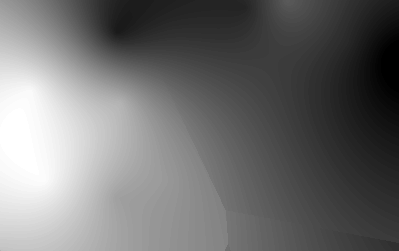

In [73]:
raster = arcpy.Raster(precipitation)
raster

Extract my mask

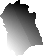

In [74]:
aoi = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\aoi\mdr.shp'
input_raster = precipitation 
clip_feature = aoi
out_path = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\precipitation_aoi.tif'
Precipitation_aoi = arcpy.sa.ExtractByMask(input_raster, clip_feature)
Precipitation_aoi.save(out_path)
raster = arcpy.Raster(out_path)
raster

Reclassify

In [76]:
raster_class = r'C:\SL_ARCGIS_PRO\01_Intensidade_Pluviometrica\class.tif'

In [77]:
out_raster = arcpy.sa.Reclassify(out_path, "VALUE", "362,710205 367,791174 1;367,791174 372,872144 2;372,872144 377,953113 3;377,953113 383,034082 4;383,034082 388,115051 5", "DATA");
out_raster.save(raster_class)

In [78]:
#Directory
out_poligon = os.path.join(workspace, 'classes') 
classified = os.path.join(workspace, 'class.tif') 

In [79]:
#Conversion from raster to a feature class
arcpy.conversion.RasterToPolygon(classified,
                                     out_poligon,
                                     "SIMPLIFY",
                                     "Value",
                                     "SINGLE_OUTER_PART",
                                     None)

<Result 'C:\\SL_ARCGIS_PRO\\01_Intensidade_Pluviometrica\\classes.shp'>